In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
cust = pd.read_csv(r"E:\Datasets\Zeotap Task\Customers.csv")
cust['SignupDate'] = pd.to_datetime(cust['SignupDate'])
prod = pd.read_csv(r"E:\Datasets\Zeotap Task\Products.csv")
trans = pd.read_csv(r"E:\Datasets\Zeotap Task\Transactions.csv")
trans['TransactionDate'] = pd.to_datetime(trans['TransactionDate'])

merged_data = trans.merge(cust, on='CustomerID').merge(prod.drop('Price',axis=1), on='ProductID')

In [4]:
cust

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [5]:
prod

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [6]:
trans

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [7]:
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics


# Exploratory Data Analysis (EDA)

In [20]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [21]:
merged_data.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
dtype: int64

## 1. Customers

In [22]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       200 non-null    object        
 1   CustomerName     200 non-null    object        
 2   Region           200 non-null    object        
 3   SignupDate       200 non-null    datetime64[ns]
 4   SignupYearMonth  200 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 7.9+ KB


In [23]:
cust.describe()

,SignupDate
count,200
mean,2023-07-19 08:31:12
min,2022-01-22 00:00:00
25%,2022-09-26 12:00:00
50%,2023-08-31 12:00:00
75%,2024-04-12 12:00:00
max,2024-12-28 00:00:00


In [24]:
cust.isna().sum()

CustomerID         0
CustomerName       0
Region             0
SignupDate         0
SignupYearMonth    0
dtype: int64

C:\Users\iamaj\AppData\Local\Temp\ipykernel_32108\1196507517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cust, x='Region', palette='viridis')


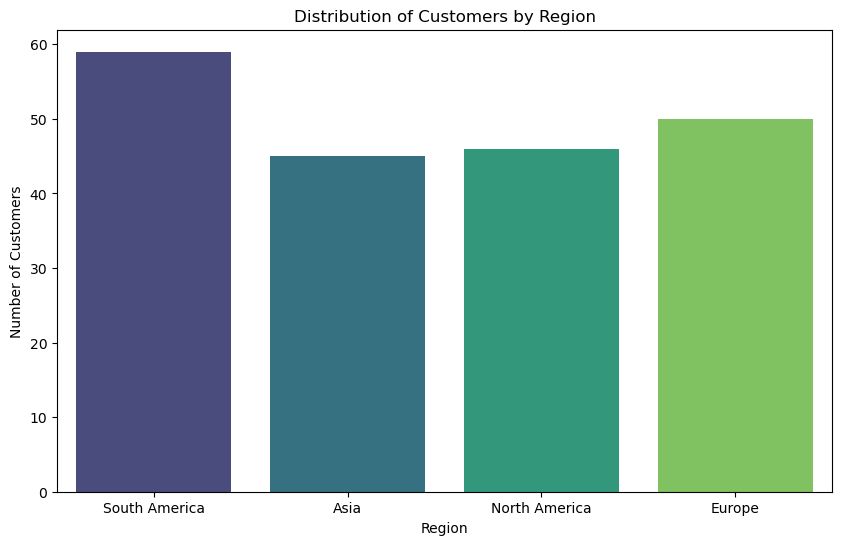

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x='Region', palette='viridis')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\iamaj\AppData\Local\Temp\ipykernel_32108\3842064608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cust, x=cust['SignupDate'].dt.year, palette='viridis')


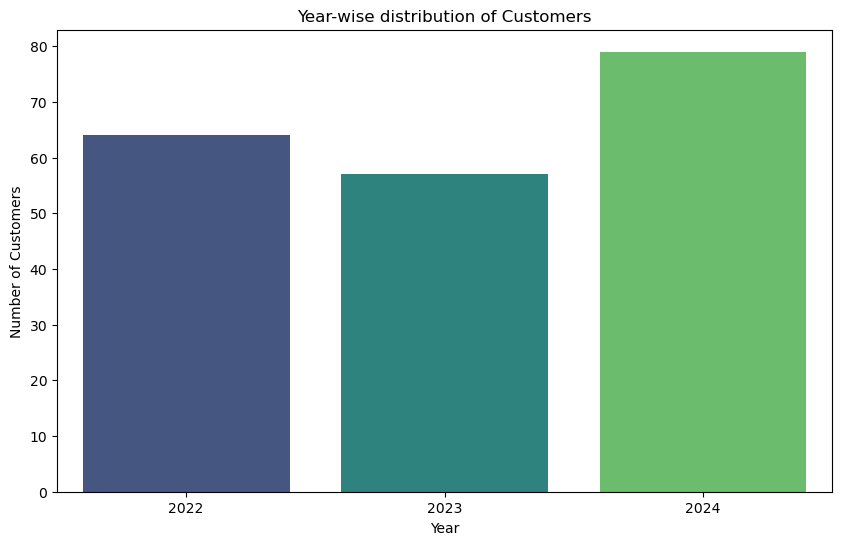

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x=cust['SignupDate'].dt.year, palette='viridis')
plt.title('Year-wise distribution of Customers')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\iamaj\AppData\Local\Temp\ipykernel_32108\583240373.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




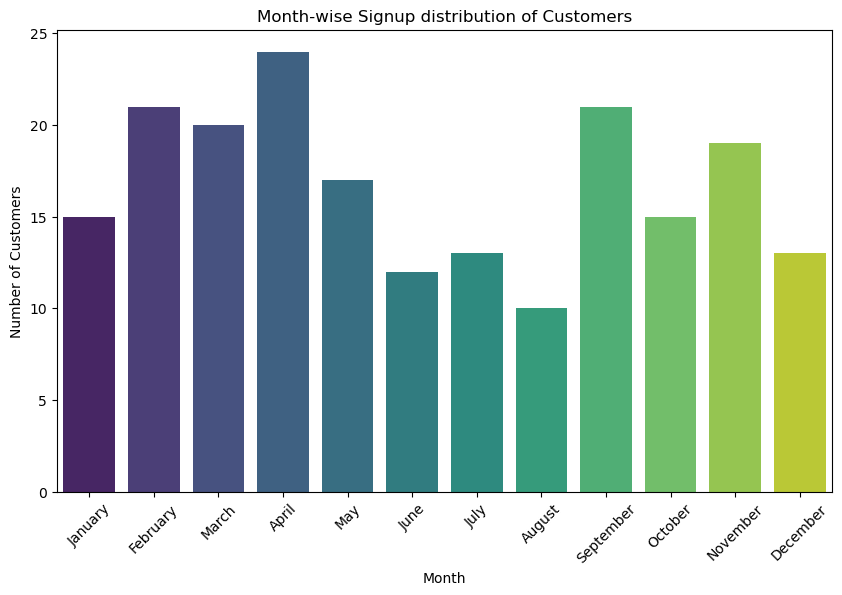

In [31]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']


plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x=cust['SignupDate'].dt.month_name(), palette='viridis',order=month_order)
plt.title('Month-wise Signup distribution of Customers')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Number of Customers')
plt.show()

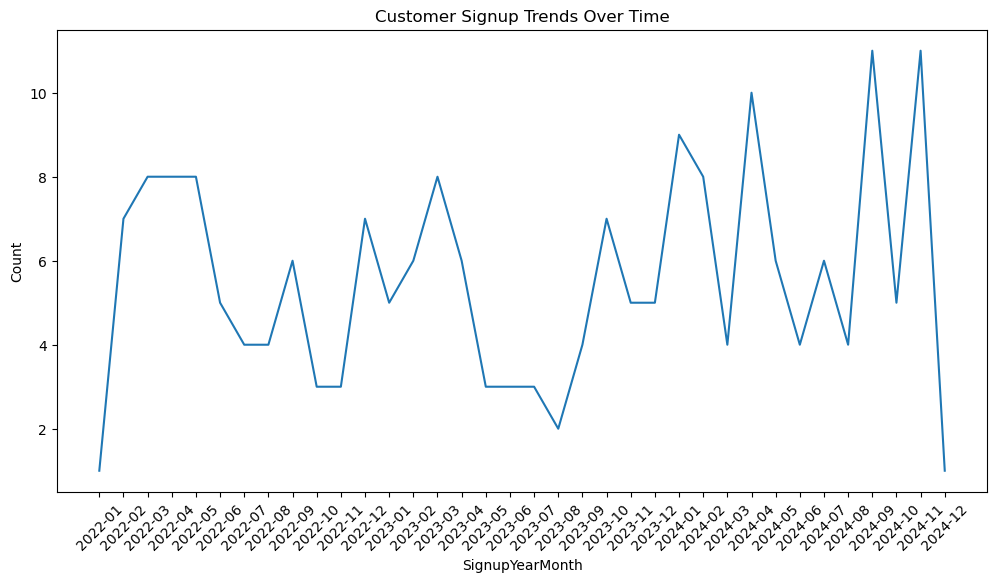

In [13]:
cust['SignupYearMonth'] = cust['SignupDate'].dt.to_period('M').astype(str)
signup_trend = cust.groupby('SignupYearMonth').size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=signup_trend, x='SignupYearMonth', y='Count')
plt.title('Customer Signup Trends Over Time')
plt.xticks(rotation=45)
plt.show()

## 2. Products

In [25]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [26]:
prod.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [27]:
prod.isna().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

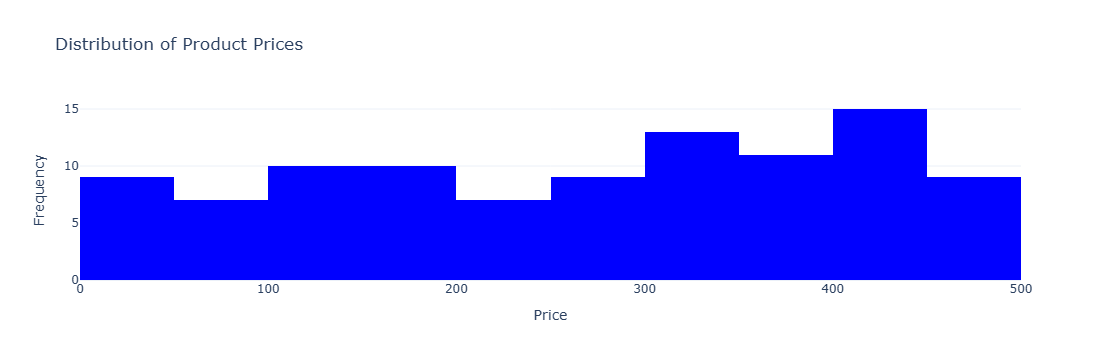

In [32]:
# Create histogram
fig = go.Figure(data=[go.Histogram(x=prod["Price"], nbinsx=20, marker_color='blue')])

# Update layout
fig.update_layout(
    title="Distribution of Product Prices",
    xaxis_title="Price",
    yaxis_title="Frequency",
    template="plotly_white"
)

# Show figure
fig.show()

In [15]:
top_10_expensive = prod.nlargest(10, 'Price')
print("Top 10 most expensive products:")
top_10_expensive[['ProductName', 'Price']]

Top 10 most expensive products:


,ProductName,Price
74,TechPro Textbook,497.76
31,BookWorld Cookbook,488.63
44,SoundWave T-Shirt,481.78
16,ActiveWear Textbook,469.77
36,SoundWave Smartwatch,459.86
40,ComfortLiving Smartphone,456.28
82,ActiveWear Smartwatch,455.72
22,ActiveWear Cookware Set,454.53
63,HomeSense Running Shoes,452.42
93,HomeSense Cookware Set,447.34


C:\Users\iamaj\AppData\Local\Temp\ipykernel_32108\1605524511.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




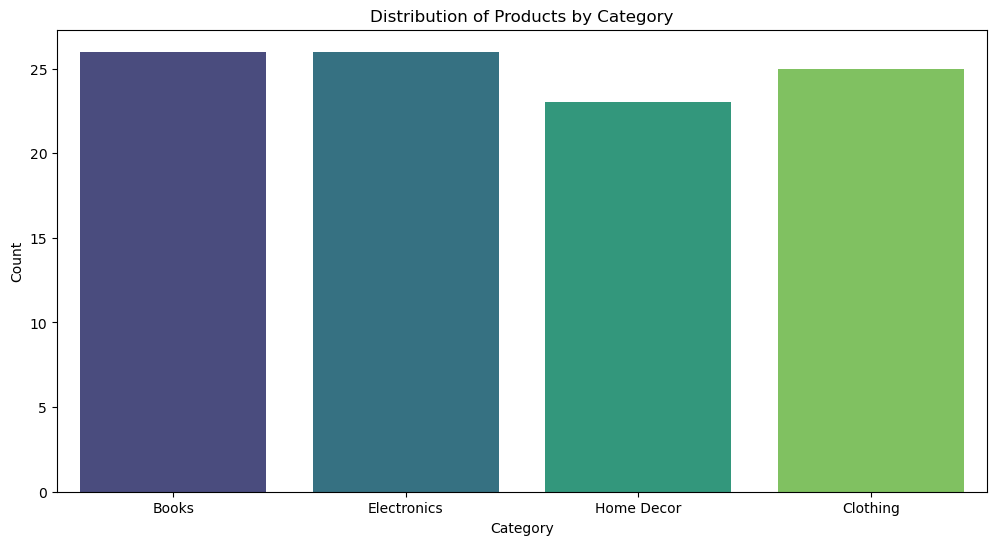

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=prod, x='Category',  palette='viridis')
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

C:\Users\iamaj\AppData\Local\Temp\ipykernel_32108\3683782056.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




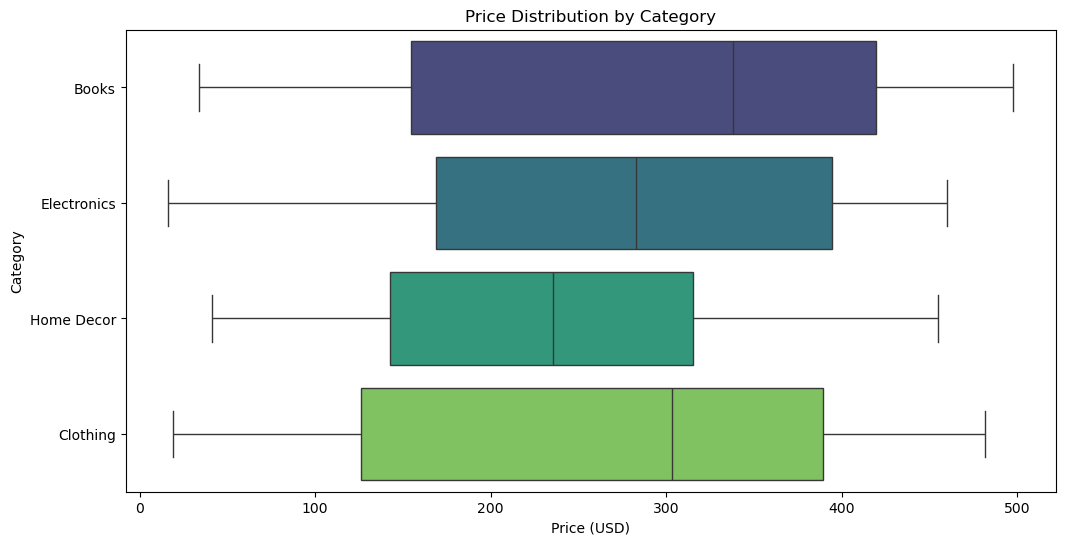

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=prod, x='Price', y='Category', palette='viridis')
plt.title('Price Distribution by Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.show()

## 3. Transactions

In [28]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [29]:
trans.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


In [30]:
trans.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

C:\Users\iamaj\AppData\Local\Temp\ipykernel_32108\1158843781.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




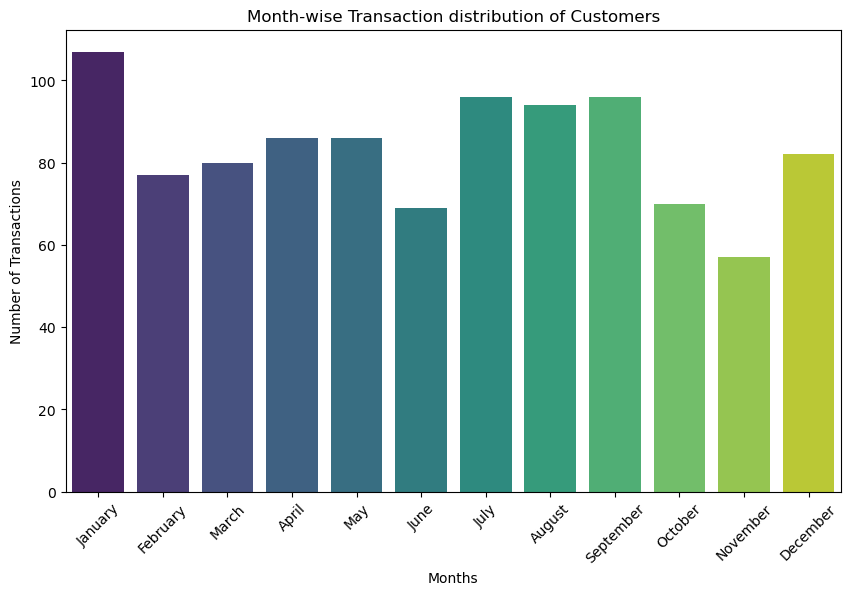

In [19]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']


plt.figure(figsize=(10, 6))
sns.countplot(data=cust, x=trans['TransactionDate'].dt.month_name(), palette='viridis',order=month_order)
plt.title('Month-wise Transaction distribution of Customers')
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.ylabel('Number of Transactions')
plt.show()

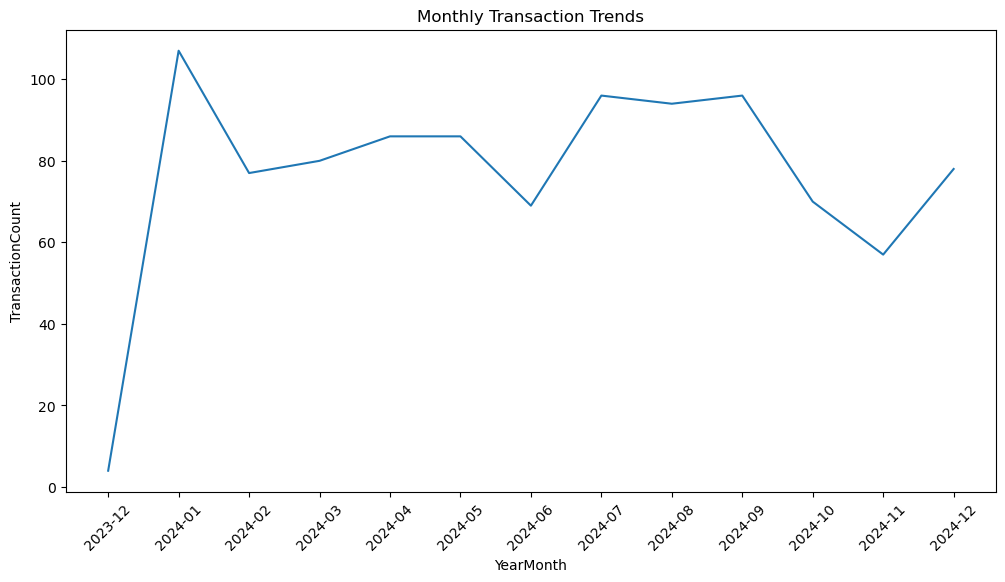

In [133]:
trans['YearMonth'] = trans['TransactionDate'].dt.to_period('M').astype(str)
monthly_txns = trans.groupby('YearMonth').size().reset_index(name='TransactionCount')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_txns, x='YearMonth', y='TransactionCount')
plt.title('Monthly Transaction Trends')
plt.xticks(rotation=45)
plt.show()

C:\Users\iamaj\AppData\Local\Temp\ipykernel_23672\3879790703.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




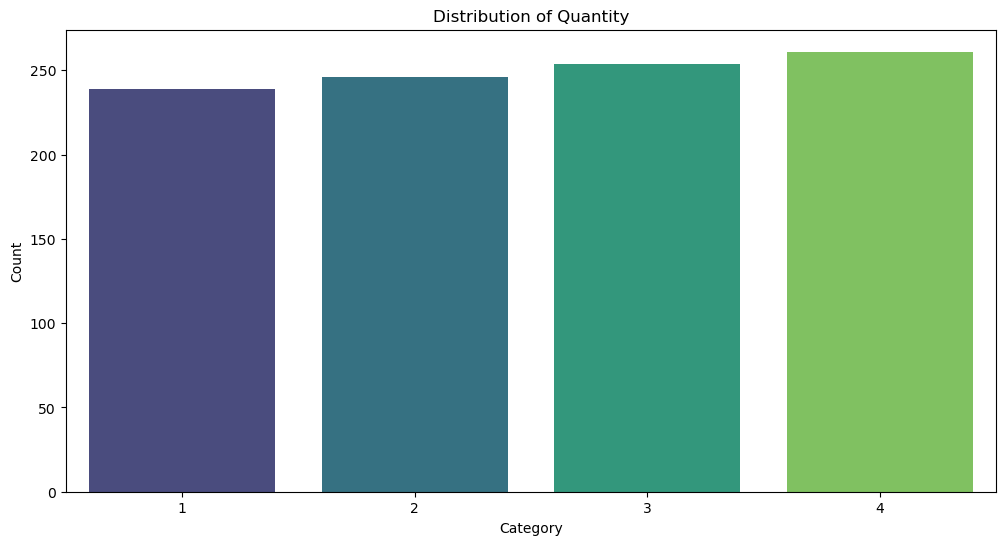

In [142]:
plt.figure(figsize=(12, 6))
sns.countplot(data=trans, x='Quantity',  palette='viridis')
plt.title('Distribution of Quantity')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

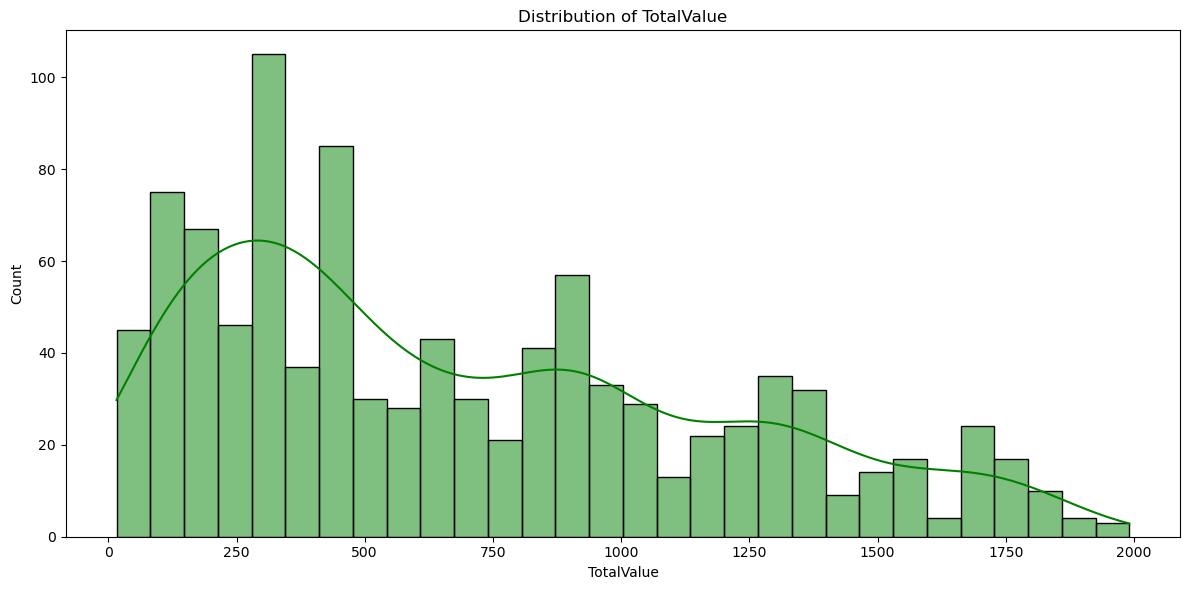

In [143]:
plt.figure(figsize=(12, 6))
sns.histplot(trans['TotalValue'], bins=30, kde=True, color='green')
plt.title('Distribution of TotalValue')
plt.tight_layout()
plt.show()

## Combined 

In [10]:
repeat_customers = merged_data.groupby('CustomerID')['TransactionID'].nunique().reset_index()
repeat_customers = repeat_customers.rename(columns={'TransactionID': 'NumberOfTransactions'})

# Merge with customer details
repeat_customers = pd.merge(repeat_customers, cust, on='CustomerID')

# Percentage of repeat customers
repeat_customers['IsRepeatCustomer'] = repeat_customers['NumberOfTransactions'] > 1
repeat_customer_percentage = repeat_customers['IsRepeatCustomer'].mean() * 100

print(f"Percentage of Repeat Customers: {repeat_customer_percentage:.2f}%")

Percentage of Repeat Customers: 93.97%


In [11]:
repeat_customer_revenue = merged_data[merged_data['CustomerID'].isin(
    repeat_customers[repeat_customers['IsRepeatCustomer']]['CustomerID']
)]['TotalValue'].sum()

total_revenue = merged_data['TotalValue'].sum()
repeat_customer_revenue_percentage = (repeat_customer_revenue / total_revenue) * 100

print(f"Repeat Customers Contribute {repeat_customer_revenue_percentage:.2f}% of Total Revenue")


Repeat Customers Contribute 99.08% of Total Revenue


In [144]:
top_prod_ids = merged_data.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10).reset_index()
#top_prod_ids = top_prod_ids.rename(columns = {'ProductID':"Revenue"})
#prod[prod['ProductID'].isin(['P029'])]

pd.merge(top_prod_ids, prod, on='ProductID')
#top_prod_ids

,ProductID,TotalValue,ProductName,Category,Price
0,P029,19513.80,TechPro Headphones,Electronics,433.64
1,P079,17946.91,ActiveWear Rug,Home Decor,417.37
2,P048,17905.20,TechPro Cookbook,Books,416.40
3,P020,15060.92,ActiveWear Jacket,Clothing,396.34
4,P062,14592.24,HomeSense Novel,Books,374.16
5,P059,13947.20,SoundWave Jeans,Clothing,303.20
6,P039,13778.88,TechPro Smartwatch,Electronics,430.59
7,P083,13671.60,ActiveWear Smartwatch,Electronics,455.72
8,P019,13487.95,ComfortLiving Sweater,Clothing,385.37
9,P041,13232.12,ComfortLiving Smartphone,Electronics,456.28


In [145]:
pd.merge(merged_data['ProductID'].value_counts().head(10).reset_index(), prod, on='ProductID')

,ProductID,count,ProductName,Category,Price
0,P059,19,SoundWave Jeans,Clothing,303.20
1,P029,17,TechPro Headphones,Electronics,433.64
2,P062,16,HomeSense Novel,Books,374.16
3,P079,16,ActiveWear Rug,Home Decor,417.37
4,P054,16,SoundWave Cookbook,Books,57.30
5,P061,16,HomeSense Desk Lamp,Home Decor,156.96
6,P048,15,TechPro Cookbook,Books,416.40
7,P022,15,HomeSense Wall Art,Home Decor,137.54
8,P096,15,SoundWave Headphones,Electronics,307.47
9,P049,15,TechPro Textbook,Books,147.95


In [161]:
top_customer_ids = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5).index

cust[cust['CustomerID'].isin(top_customer_ids)]

,CustomerID,CustomerName,Region,SignupDate,SignupYearMonth
53,C0054,Bruce Rhodes,Asia,2024-09-29,2024-09
64,C0065,Gerald Hines,North America,2024-07-10,2024-07
81,C0082,Aimee Taylor,South America,2022-05-13,2022-05
140,C0141,Paul Parsons,Europe,2023-02-23,2023-02
155,C0156,William Adams,North America,2023-08-19,2023-08
